# **DIFFERENTIAL EQUATIONS WITH PYTHON**
                        
                     Dr. GHULAM MURTAZA
### **Learning objectives**

*   Solving differential equations using Sympy
*   Solving differential equation using Laplace tarnsformation
*   Initial value problems using scipy

*   Boundary Value problems using scipy










### **Solving differential equations using Sympy**
We start with a very simple example:
$$y''+2y'+y=0$$


In [7]:
from sympy import *       #symbols, Function,Eq, dsolve,checkodesol,sin,pi,laplace_transform,inverse_laplace_transform,lambdify
from matplotlib import pyplot as plt
import numpy as np

In [15]:
x = symbols('x') # x variable contains symbol x
y = Function('y')(x) # a way for defining dependent variable using sympy
yp = y.diff(x)
ypp = yp.diff(x) # or ypp = y.diff((x, 2))
yppp = ypp.diff(x) # ypp = y.diff((x, 3))

In [3]:
z=Function('z')
z=sin(x)
z.subs(x,pi/6)

1/2

In [5]:
#now we will solve y''+2y'+y=0
eq = ypp + 2*yp + y
solution=dsolve(eq, y)
print("solution:",solution)
#pprint(solution)
#solution


solution: Eq(y(x), (C1 + C2*x)*exp(-x))


In [13]:
#same problem solve by using sympy.Eq
eq1=Eq(ypp + 2*yp + y,0)
solution1=dsolve(eq1, y)
print("solution1:",solution1)
#pprint(solution1)

solution1: Eq(y(x), (C1 + C2*x)*exp(-x))


In [7]:
print("right hand side of solution:",solution.lhs)
print("left hand side of solution:",solution.rhs)
pprint(solution)

right hand side of solution: y(x)
left hand side of solution: (C1 + C2*x)*exp(-x)
                    -x
y(x) = (C₁ + C₂⋅x)⋅ℯ  


In [8]:
checkodesol(eq,solution)#Substitutes ``solution`` into ``ode`` and checks that the result is ``0``.

(True, 0)

**Q:** Solve the following differential equation:
$$ x^2y''- 3xy'+ 4y=0$$

Now we take a nonhomegenous equation:
$$y''-4y=(x^{2}-3)sin(2x)$$

In [16]:
eq1=Eq(ypp -4* y,(x**2-3)*sin(2*x))
solution=dsolve(eq1, y)
solution


Eq(y(x), C1*exp(-2*x) + C2*exp(2*x) - x**2*sin(2*x)/8 - x*cos(2*x)/8 + 13*sin(2*x)/32)

**Q:** Solve the following differential equation:
$$y''-4y=12x$$

In [25]:
classify_ode(eq, y)
dsolve(eq, y, hint="all")
#from sympy.solvers import ode
#ode.allhints

{'nth_linear_constant_coeff_variation_of_parameters_Integral': Eq(y(x), C1*exp(-2*x) + C2*exp(2*x) - 3*x),
 'nth_linear_constant_coeff_undetermined_coefficients': Eq(y(x), C1*exp(-2*x) + C2*exp(2*x) - 3*x),
 'nth_linear_constant_coeff_variation_of_parameters': Eq(y(x), C1*exp(-2*x) + C2*exp(2*x) - 3*x),
 'best': Eq(y(x), C1*exp(-2*x) + C2*exp(2*x) - 3*x),
 'best_hint': 'nth_linear_constant_coeff_undetermined_coefficients',
 'default': 'nth_linear_constant_coeff_undetermined_coefficients',
 'order': 2}

**Keyword arguments: hint** "is the solving method that you want dsolve to use."


 For example, if you know that given differential equation is a separable equation, you can use keyword `hint='separable'` to force dsolve to resolve it as a separable equation: For this, see the following example
 $$\frac{dx}{dy}+2xy^2=0$$

In [20]:
dsolve(yp+2*x*y**2,y, hint='separable')

Eq(y(x), 1/(C1 + x**2))

**Q:** Solve the following Differential equation using variation of parameter method:
$$y''-4y=(x^{2}-3)cos(5x)$$

**Initial value problem:** An initial value problem (IVP) is a differential equation with a set of constraints at the initial point.$$\frac{d^{n}y}{dx^{n}}=f(x,y,y^{\prime },\cdots ,y^{(n-1)})$$ $$y(x_{0})=y_{0},y(x_{0})=y_{1},\cdots ,y^{(n-1)}(x_{0})=y_{n-1}.$$
Example:$$y''-4y=12x, y(0)=4, y'(0)=1$$

In [26]:
eq=Eq(ypp-4*y,12*x)
solution=dsolve(eq, y,ics={y.subs(x,0):4,yp.subs(x,0):1})
print("solution:",solution.rhs)
solution


solution: -3*x + 3*exp(2*x) + exp(-2*x)


Eq(y(x), -3*x + 3*exp(2*x) + exp(-2*x))

**Q:** Rewrite and solve the above initial value problem for your own inital condition. 

# Plotting the solution
+ plotting using sympy
+ plotting using matplotlib 

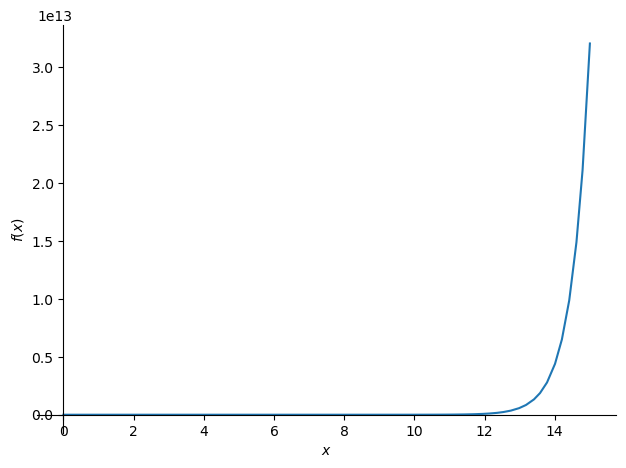

In [28]:
from sympy.plotting import plot # plot function is used for plotting 2d graph in sympy

plot(solution.rhs,(x,0,15))

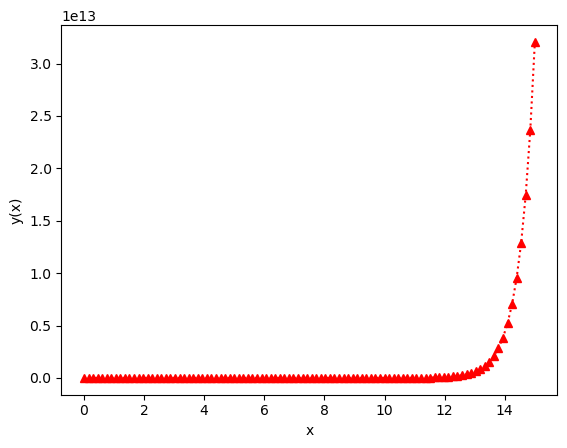

In [29]:
################################################
sol_func=lambdify(x,solution.rhs,'numpy')
#lambdify function is used to convert sympy function into numpy function
################################################
x_span = np.linspace(0, 15, 100)
y_span=sol_func(x_span)
plt.plot(x_span,y_span,'^:r')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

**Boundary Value problem:**
Example:$$y''+y=x^2+1, y(0)= 5, y(1)=0$$

In [30]:
eq=Eq(ypp +y,x**2+1)
solution=dsolve(eq, y,ics={y.subs(x,0):5,y.subs(x,1):0})
solution


Eq(y(x), x**2 - 6*sin(x)*cos(1)/sin(1) + 6*cos(x) - 1)

**Coupled system:** Mixing of fluid in two tanks
\begin{eqnarray*}
\frac{dx_1}{dt} &=&-\frac{2}{25}x_1+\frac{1}{50}x_2 \\
\frac{dx_2}{dt} &=&\frac{2}{25}x_1-\frac{2}{25}x_2\\
x_1(0) &=&25,x_2(0) =0
\end{eqnarray*}

In [32]:
t = symbols('t')
x1 =Function('x1')(t)
x2=Function('x2')(t)

x1p = x1.diff(t)
x2p = x2.diff(t)

eqs=[Eq(x1p,(-2/25)*x1+(1/50)*x2),Eq(x2p,(2/25)*x1-(2/25)*x2)]
solution=dsolve(eqs,[x1,x2],ics={x1.subs(t,0):25,x2.subs(t,0):0})
pprint(solution[0])
pprint(solution[1])

              -0.12⋅t         -0.04⋅t
x₁(t) = 12.5⋅ℯ        + 12.5⋅ℯ       
                -0.12⋅t         -0.04⋅t
x₂(t) = - 25.0⋅ℯ        + 25.0⋅ℯ       


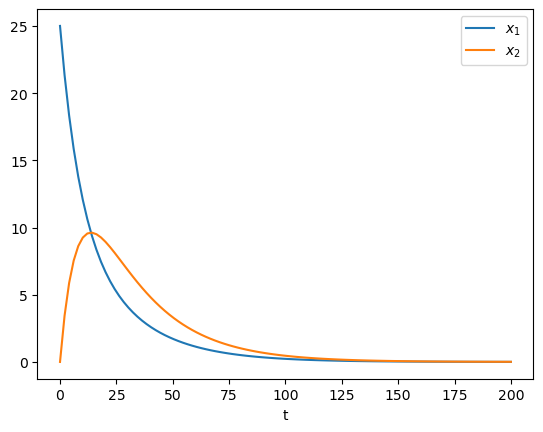

In [33]:
#plotting using numpy
t_span = np.linspace(0, 200, 100)

sol_func=lambdify(t,[solution[0].rhs,solution[1].rhs],'numpy')
y_span=sol_func(t_span)

plt.plot(t_span,y_span[0],t_span,y_span[1])
plt.xlabel('t')
plt.legend(["$x_1$", "$x_2$"])
plt.show()

**Q:** Plot the above by using sympy.

**Can we solve every type of differential equation using dsolve:**
 NO!

A differential equation which is not solvable with dsolve:
$$y'''-y^2=0$$

In [34]:
eq=Eq(yppp-y**2,0)
dsolve(eq, y)
#classify_ode(eq, y)

NotImplementedError: solve: Cannot solve -y(x)**2 + Derivative(y(x), (x, 3))

### **Solving differential equation using Laplace tarnsformation**
Consider the following problem:
$$y''+ 5y'+ 4y= 0, y(0)= 1, y'(0)= 0$$


In [5]:
from sympy import *

t = symbols('t',real=true,positive=true)
s = symbols('s')
y = Function('y')(t)
Y = laplace_transform(y, t, s)
def LT(y):
    return laplace_transform(y, t, s)
def ILT(Y):
    return inverse_laplace_transform(Y, s, t)


lap_eq=Eq(s**2*LT(y)-s*(1)-0+5*s*LT(y)-5+4*LT(y),0)

Inv_eq=ILT(solve(lap_eq,Y)[0])
Inv_eq



(4*exp(3*t) - 1)*exp(-4*t)/3

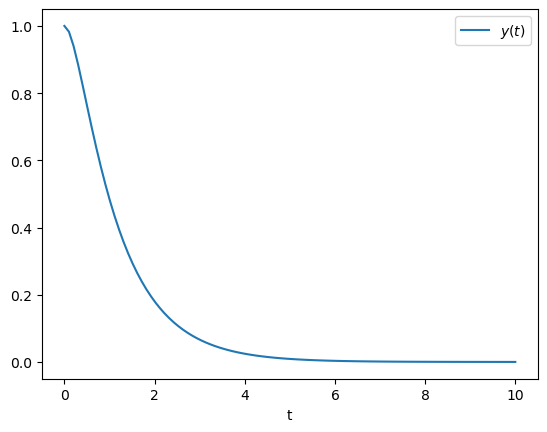

In [8]:
sol_func=lambdify(t,ILT(solve(lap_eq,Y)[0]),'numpy')
t_span = np.linspace(0, 10, 100)
y_span=sol_func(t_span)

plt.plot(t_span,y_span)
plt.xlabel('t')
plt.legend(["$y(t)$"])
plt.show()

### **Initial value problems using scipy**
 We start with a very basic problem: Exponential decay
\begin{eqnarray*}
\frac{dy}{dx} &=&ky \\
y(x_{0}) &=&y_{0},
\end{eqnarray*} where $k$ is a negative number.





**Example**
\begin{eqnarray*}
\frac{dy}{dx} &=&-0.5y \\
y(0) &=&2,
\end{eqnarray*}

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [3]:
def exponential_decay(t, y):
    return -0.5 * y

In [57]:

###############################
t_span=(0,10)                #t0,tf
y0=[2]                       #initial value y(0)=2
##############################

solution = solve_ivp(exponential_decay,t_span,y0)


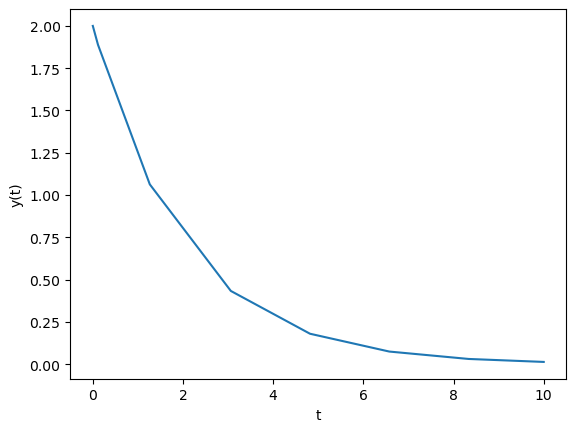

In [58]:
plt.plot(solution.t,solution.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

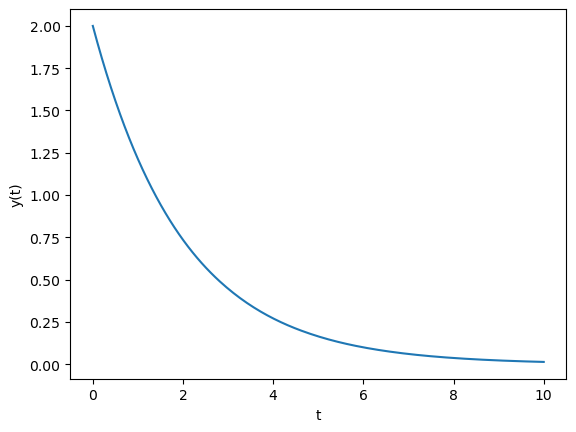

In [4]:
t_span=(0,10)
##################################
t_eval = np.linspace(0, 10, 200)# evaluation points
###################################
y0=[2]
sol = solve_ivp(exponential_decay,t_span,y0,t_eval=t_eval)
plt.plot(sol.t,sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

**Example** A second oder ivp
\begin{eqnarray*}
y''+y &=&sin(x) \\
y(0) &=&\pi/2\\
y'(0) &=&\pi\\x\in[0,5]
\end{eqnarray*}
can be written alternatively as follows
\begin{eqnarray*}
z^{'}+y &=&sin(x)\\
\end{eqnarray*}
where
\begin{eqnarray*}
z&=&y'\\
y(0) &=&\pi/2\\
z(0) &=&\pi
\end{eqnarray*}
Now our problem becomes like this
$$%
\begin{bmatrix}
y \\
z%
\end{bmatrix}%
^{\prime }=%
\begin{bmatrix}
z \\
\sin x-y%
\end{bmatrix}%
$$
with initial condition
$$%
\begin{bmatrix}
y(0) \\
z(0)%
\end{bmatrix}%
=%
\begin{bmatrix}
\pi/2 \\
\pi%
\end{bmatrix}%
$$


In [5]:
def ode_function(t, y):
    return np.array([y[1],np.sin(t)-y[0]])

In [6]:
t_span = (0,50)
t_eval = np.linspace(0, 50, 200)
y0 = np.array([np.pi /2, np.pi])
sol = solve_ivp(ode_function,t_span,y0,t_eval=t_eval)


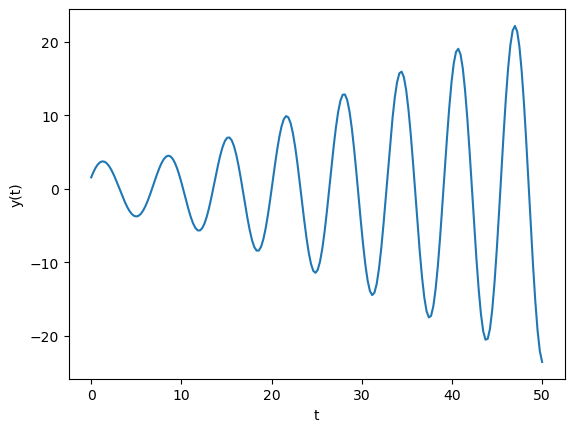

In [7]:
plt.plot(sol.t,sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()

### **Boundary value problems**
A boundary value problem (BVP) is a differential equation with a set of constraints at the boundary points. For a second oder differential equation $$\frac{d^{2}y}{dx^{2}}=f(x,y,y^{\prime }), x\in[a,b]$$
any of the following conditions can be used for boundary conditions:
\begin{eqnarray}
y(a) &=& y_0,y(b) &=& y_1 \\
y'(a) &=& y_0,y'(b) &=& y_1 \\
y'(a) &=& y_0,y(b) &=& y_1 \\
y(a) &=& y_0,y'(b) &=& y_1
\end{eqnarray}

**Example:**
$y'' + y = cos(t); y'(0) = 5; y(\pi) = -5/3$


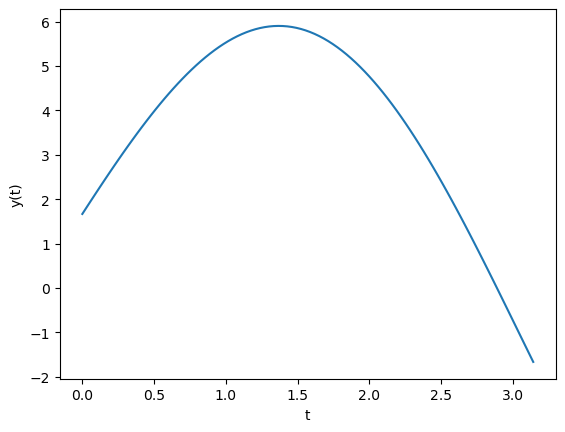

In [8]:
from scipy.integrate import solve_bvp
import numpy as np
import matplotlib.pyplot as plt

def ode(t,y):
    return np.array([y[1], np.cos(t) - y[0]])

def bc(ya,yb):

# ya are the initial values
# yb are the final values
# each entry of the return array will be set to zero
    return np.array([ya[1] - 5, yb[0] + 5/3])

t_steps = 100
t = np.linspace(0,np.pi,t_steps)

# element 4: the initial guess.
y0 = np.zeros((2,t_steps))

# Solve the system.
sol = solve_bvp(ode, bc, t, y0)

# here we plot sol.x instead of sol.t
plt.plot(sol.x, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.show()